In [1]:
# set conda
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

# install psi4
!conda install -q -y psi4 python=3.7 -c psi4

# install rdkit
!conda install -q -y rdkit python=3.7 -c rdkit

# set path
import sys
sys.path.append("/usr/local/lib/python3.7/site-packages/")

# this command is needed to avoid "Loder" error.
!pip install distributed

--2022-04-21 23:40:23--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2022-04-21 23:40:23--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75660608 (72M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  72.16M  19.8MB/s    in 3.3s    

2022-04-21 23:40:26 (21.7 MB/s) - ‘Miniconda3-latest-Linu

In [2]:
# import Psi4
import psi4
# check Psi4 version
print(psi4.__version__)

1.5


In [3]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, PandasTools
from rdkit.Chem.Draw import IPythonConsole
# check rdkit version
print('rdkit version: ', rdBase.rdkitVersion)

rdkit version:  2020.09.1


In [86]:
## convert SMILES to xyz format
def smi2xyz(smiles):
    mol = Chem.AddHs(Chem.MolFromSmiles(smiles)) # make mol object and add Hydrogen
    AllChem.EmbedMolecule(mol, AllChem.ETKDGv3()) # expand 3D
    AllChem.MMFFOptimizeMolecule(mol) # structure optimization by MMFF
    #xyz = Chem.MolToXYZBlock(mol)
    conf = mol.GetConformer(-1)

    plus = smiles.count('+')
    minus = smiles.count('-')
    charge = plus - minus + 0 # total charge
    
    xyz = str(charge) + " 1"
    for atom, (x,y,z) in zip(mol.GetAtoms(), conf.GetPositions()):
        xyz += '\n'
        xyz += '{} {} {} {}'.format(atom.GetSymbol(), x, y, z)
        #xyz += '{}\t{}\t{}\t{}'.format(atom.GetSymbol(), x, y, z)
        
    return xyz

In [87]:
xyz = smi2xyz('CC(OC1=C(C(=O)O)C=CC=C1)=O CC(=O)OC1C=CC=CC=1C(O)=O')
print (xyz)

0 1
C 3.378710530393312 -0.07374799348283302 -0.032183747239199534
C 1.9583918104348206 0.020355298732481767 -0.5041246762812926
O 1.169364290026707 0.486285123763607 0.5406975963724473
C -0.18295699978106428 0.5618086575160411 0.1993840726336949
C -1.0476349559251636 -0.5389063134433305 0.26992350448560276
C -0.6559415749040439 -1.9063984757906005 0.6941337459920601
O -1.3810171653067473 -2.885861719787021 0.6570369475741382
O 0.5921916489029584 -2.01148660947263 1.1808678334774037
C -2.3958162903969886 -0.35094878401742263 -0.0780216676343089
C -2.8670272929361817 0.90697660319288 -0.4654538384719728
C -1.998348892076964 1.9955894802268592 -0.5069227357870482
C -0.6566133606155033 1.8270395835642421 -0.16981275524448247
O 1.587008116245022 -0.26249024044442654 -1.6356243424159957
H 3.7456202597060706 0.9194876128116753 0.23798045698242185
H 4.002280790901 -0.4702981846116089 -0.8385371174868597
H 3.442329260193217 -0.7538226384901511 0.8209671442063027
H 0.660221542503539 -2.96082051

In [58]:
!pip install py3Dmol

In [72]:
import py3Dmol
print(py3Dmol.__version__)

1.8.0


In [104]:
mol = psi4.geometry(xyz)

def drawPsi4Geom(mol):
    xyz = mol.save_string_xyz_file() 
    view = py3Dmol.view(width=400, height=400)
    view.addModel(xyz, "xyz")
    view.setStyle({'stick':{}})
    view.zoomTo()
    return(view.show())

drawPsi4Geom(mol)

#mol = psi4.geometry("pubchem:2244")
#drawPsi4Geom(mol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [96]:
psi4.core.set_output_file("log.txt")

psi4.set_memory('10GB')
psi4.set_num_threads(2)

level = 'B3LYP-D3BJ/6-311G(d,p)'

scf_e, wfn = psi4.energy(level, return_wfn = True)
print('energy at the {} level of theory:\t{:.4f}'.format(level, scf_e))

energy at the B3LYP-D3BJ/6-311G(d,p) level of theory:	-648.9064


In [97]:
psi4.oeprop(wfn, 'WIBERG_LOWDIN_INDICES')
!cat log.txt


  Memory set to   9.313 GiB by Python driver.
  Threads set to 2 by Python driver.

Scratch directory: /tmp/

Scratch directory: /tmp/

*** tstart() called on 8248c7da6e55
*** at Fri Apr 22 01:42:15 2022

   => Loading Basis Set <=

    Name: 6-311G(D,P)
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2, 4-6, 9-12 entry C          line   113 file /usr/local/share/psi4/basis/6-311g_d_p_.gbs 
    atoms 3, 7-8, 13     entry O          line   151 file /usr/local/share/psi4/basis/6-311g_d_p_.gbs 
    atoms 14-21          entry H          line    32 file /usr/local/share/psi4/basis/6-311g_d_p_.gbs 

   => B3LYP-D3(BJ): Empirical Dispersion <=

    Grimme's -D3 (BJ-damping) Dispersion Correction
    Grimme S.; Ehrlich S.; Goerigk L. (2011), J. Comput. Chem., 32: 1456

        s6 =       1.000000
        s8 =       1.988900
        a1 =       0.398100
        a2 =       4.421100


         ---------------------------------------------------------
                                   SCF
      

In [99]:
import numpy as np
psi4.oeprop(wfn,'DIPOLE')
dipole_vec = psi4.variable('scf dipole')
dipole = np.sqrt(np.sum(dipole_vec ** 2))
print(f'{dipole:.3f} [D]')

1.041 [D]


In [100]:
level = 'B3LYP-D3BJ/STO-3G' # Mulliken charge
scf_e, wfn = psi4.energy(level, return_wfn = True)

In [101]:
import pandas as pd
df = pd.DataFrame()
psi4.oeprop(wfn, 'MULLIKEN_CHARGES')
df[level] = np.array(wfn.atomic_point_charges())
df

,B3LYP-D3BJ/STO-3G
0,-0.250102
1,0.247461
2,-0.176994
3,0.104392
4,-0.031965
5,0.231145
6,-0.240893
7,-0.246826
8,-0.064906
9,-0.080082


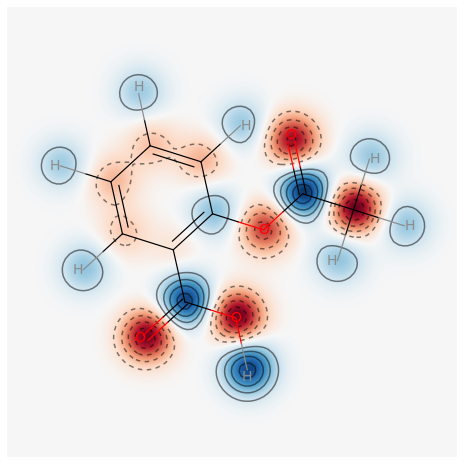

In [102]:
rdkit_aspirin = Chem.AddHs(Chem.MolFromSmiles('CC(OC1=C(C(=O)O)C=CC=C1)=O CC(=O)OC1C=CC=CC=1C(O)=O'))
mulliken = np.array(wfn.atomic_point_charges())

## Visualization with similarity map
from rdkit.Chem.Draw import SimilarityMaps
fig = SimilarityMaps.GetSimilarityMapFromWeights(rdkit_aspirin, mulliken, colorMap='RdBu')